Final project by:\
Justin Wang\
Terrell Davis\
Daniel Hu

In [1]:
%pip install spotipy
import os
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf



Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Overview : \
In this final tutorial, our objective is to enhance the understanding of music trends  through the application of the data science pipeline. Musical as a subject matter is quiet complex even if on the surface level it is just ordering sounds in the pattern. As time changes and location differs.Depending on who you are. You and the peer around you will gravitate towards these similar ordering sounds in the pattern. We intend to analyze various aspects, including overarching regional disparities in music trends as compared to global trends, and the specific music genres that are currently in vogue. Furthermore, we will create a model to better understand the association between this factor in the music industry, this process will ultimately enable us to gain deeper insights many into many of these things like Spotify's evaluation criteria, shedding light on the factors they prioritize when assessing a song's popularity.

Part 1: Data Collection \
Data Colllection for this final tutorial will be done by using spotify api.Which doesn't demand us to scrape data.Instead requires us to create a Spotify account.Then create app for us to API authorization to obtain an access token so that we can API requests data as needed.In this section we collect data from Spotify playlist of each country top 50 songs this week.

In [2]:
# retrieving the keys for API authorization for .env
#remove before submition 
#Client ID e94f1a8fbc29451ba2303f457059b189
#Client secret ad6df3873e094806866a9057064046d1

from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

load_dotenv()

client_id = os.getenv("CLIENT_ID")
client_secet = os.getenv("CLIENT_SECRET")
client_id = 'ae5c7d36c1fa4c78bf064ad24f781242'
client_secret = '0aefeeb858104acd8d58f5bf2ff71371'

# Create an instance of SpotifyClientCredentials with your credentials
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
print(os.environ)


environ({'COMMAND_MODE': 'unix2003', 'HOME': '/Users/terrelldavis', 'HOMEBREW_CELLAR': '/opt/homebrew/Cellar', 'HOMEBREW_PREFIX': '/opt/homebrew', 'HOMEBREW_REPOSITORY': '/opt/homebrew', 'INFOPATH': '/opt/homebrew/share/info:', 'LOGNAME': 'terrelldavis', 'MANPATH': '/opt/local/share/man:/opt/homebrew/share/man::', 'MallocNanoZone': '0', 'OLDPWD': '/', 'ORIGINAL_XDG_CURRENT_DESKTOP': 'undefined', 'PATH': '/usr/bin:/Users/terrelldavis/Library/Python/3.9/bin:/Users/terrelldavis/.docker/bin:/opt/local/bin:/opt/local/sbin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/Apple/usr/bin:/Users/terrelldavis/.docker/bin:/opt/local/bin:/opt/local/sbin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/Apple/usr/bin', 'PWD': '/', 'SHELL': '/bin/zsh', 'SHLVL': '0', 'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.O9hKPpItOh/Listeners', 'TMPDIR': '/var/folders

/Users/terrelldavis/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
Global="https://open.spotify.com/playlist/37i9dQZEVXbMDoHDwVN2tF?si=191aeed516884612"
Argentina = "https://open.spotify.com/playlist/37i9dQZEVXbMMy2roB9myp?si=b3ff258194674b4b"
Australia = "https://open.spotify.com/playlist/37i9dQZEVXbJPcfkRz0wJ0?si=6445c40f38ee4014"
Austria = "https://open.spotify.com/playlist/37i9dQZEVXbKNHh6NIXu36?si=03a53bc2e3f64ade"
Belarus = "https://open.spotify.com/playlist/37i9dQZEVXbIYfjSLbWr4V?si=dca319fc1a87457d"
Belgium = "https://open.spotify.com/playlist/37i9dQZEVXbJNSeeHswcKB?si=5b9c7c2646cc4c88"
Bolivia = "https://open.spotify.com/playlist/37i9dQZEVXbJqfMFK4d691?si=cef1b158bbf9470b"
Brazil = "https://open.spotify.com/playlist/37i9dQZEVXbMXbN3EUUhlg?si=c473a16735154f51"
Bulgaria = "https://open.spotify.com/playlist/37i9dQZEVXbNfM2w2mq1B8?si=6b79fee2f10e45f7"
Canada = "https://open.spotify.com/playlist/37i9dQZEVXbKj23U1GF4IR?si=a6f983b4269743d4"
Chile = "https://open.spotify.com/playlist/37i9dQZEVXbL0GavIqMTeb?si=7aeb19d9be014912"
Colombia = "https://open.spotify.com/playlist/37i9dQZEVXbOa2lmxNORXQ?si=9a96949a64454956"
CostaRica = "https://open.spotify.com/playlist/37i9dQZEVXbMZAjGMynsQX?si=03c43121f7be4632"
Czech = "https://open.spotify.com/playlist/37i9dQZEVXbIP3c3fqVrJY?si=ae661ffce64d40b8"
Denmark = "https://open.spotify.com/playlist/37i9dQZEVXbL3J0k32lWnN?si=181208b67d7843d9"
Dominican = "https://open.spotify.com/playlist/37i9dQZEVXbKAbrMR8uuf7?si=615f6fc5067b4fa5"
Ecuador = "https://open.spotify.com/playlist/37i9dQZEVXbJlM6nvL1nD1?si=2b13b361bb764b4f"
Egypt = "https://open.spotify.com/playlist/37i9dQZEVXbLn7RQmT5Xv2?si=bd6b49e5534a41b8"
ElSalvador = "https://open.spotify.com/playlist/37i9dQZEVXbLxoIml4MYkT?si=e6a10d938e954e3e"
Estonia = "https://open.spotify.com/playlist/37i9dQZEVXbLesry2Qw2xS?si=4dfc62b7d9ef4d85"
Finland = "https://open.spotify.com/playlist/37i9dQZEVXbMxcczTSoGwZ?si=a24fa63370784700"
France = "https://open.spotify.com/playlist/37i9dQZEVXbIPWwFssbupI?si=24d84721da8d494f"
Germany = "https://open.spotify.com/playlist/37i9dQZEVXbJiZcmkrIHGU?si=0308a4c5686d4bc0"
Greece = "https://open.spotify.com/playlist/37i9dQZEVXbJqdarpmTJDL?si=64437a696987431f"
Guatemala = "https://open.spotify.com/playlist/37i9dQZEVXbLy5tBFyQvd4?si=885f12d1abed4609"
Honduras = "https://open.spotify.com/playlist/37i9dQZEVXbJp9wcIM9Eo5?si=cbc28225923b498a"
HongKong = "https://open.spotify.com/playlist/37i9dQZEVXbLwpL8TjsxOG?si=fe5b00589a1f4ea9"
Hungary = "https://open.spotify.com/playlist/37i9dQZEVXbNHwMxAkvmF8?si=af5d874aa8e1490d"
Iceland = "https://open.spotify.com/playlist/37i9dQZEVXbKMzVsSGQ49S?si=b1226ef669b746d5"
India = "https://open.spotify.com/playlist/37i9dQZEVXbLZ52XmnySJg?si=34c467793f144c92"
Indonesia = "https://open.spotify.com/playlist/37i9dQZEVXbObFQZ3JLcXt?si=d6f176bec56445b5"
Ireland = "https://open.spotify.com/playlist/37i9dQZEVXbKM896FDX8L1?si=d1823f193fdb4516"
Israel = "https://open.spotify.com/playlist/37i9dQZEVXbJ6IpvItkve3?si=0ea52cb35874479d"
Italy = "https://open.spotify.com/playlist/37i9dQZEVXbIQnj7RRhdSX?si=c753ebd0251946e7"
Japan = "https://open.spotify.com/playlist/37i9dQZEVXbKXQ4mDTEBXq?si=8b509faa3fe3403f"
Kazakhstan = "https://open.spotify.com/playlist/37i9dQZEVXbM472oKPNKzS?si=2278787f281e40cd"
Latvia = "https://open.spotify.com/playlist/37i9dQZEVXbJWuzDrTxbKS?si=652fc5b0eb0c41e3"
Lithuania = "https://open.spotify.com/playlist/37i9dQZEVXbMx56Rdq5lwc?si=2822ecaacef34219"
Luxembourg = "https://open.spotify.com/playlist/37i9dQZEVXbKGcyg6TFGx6?si=cf99c7dfbeb440d7"
Malaysia = "https://open.spotify.com/playlist/37i9dQZEVXbJlfUljuZExa?si=b1c5280960504646"
Mexico = "https://open.spotify.com/playlist/37i9dQZEVXbO3qyFxbkOE1?si=0467e6675a7842bf"
Morocco = "https://open.spotify.com/playlist/37i9dQZEVXbJU9eQpX8gPT?si=0e65da6c7c024024"
Netherlands = "https://open.spotify.com/playlist/37i9dQZEVXbKCF6dqVpDkS?si=cd66ec12d8a044ab"
NewZealand = "https://open.spotify.com/playlist/37i9dQZEVXbM8SIrkERIYl?si=1a7b87bd6d10473c"
Nicaragua = "https://open.spotify.com/playlist/37i9dQZEVXbISk8kxnzfCq?si=987d796508b441a6"
Nigeria = "https://open.spotify.com/playlist/37i9dQZEVXbKY7jLzlJ11V?si=d4709a80c85846d7"
Norway = "https://open.spotify.com/playlist/37i9dQZEVXbJvfa0Yxg7E7?si=f53fd732e17a4656"
Pakistan = "https://open.spotify.com/playlist/37i9dQZEVXbJkgIdfsJyTw?si=60a4b3ebefa94061"
Panama = "https://open.spotify.com/playlist/37i9dQZEVXbKypXHVwk1f0?si=40712b888f4d462b"
Paraguay = "https://open.spotify.com/playlist/37i9dQZEVXbNOUPGj7tW6T?si=a5200cb44b884c23"
Peru = "https://open.spotify.com/playlist/37i9dQZEVXbJfdy5b0KP7W?si=f599f54c02064162"
Phillipines = "https://open.spotify.com/playlist/37i9dQZEVXbNBz9cRCSFkY?si=c02ae333faa14dc7"
Poland = "https://open.spotify.com/playlist/37i9dQZEVXbN6itCcaL3Tt?si=c72dfbb0e2b44213"
Portugal = "https://open.spotify.com/playlist/37i9dQZEVXbKyJS56d1pgi?si=33e8ca2aaae2469b"
Romania = "https://open.spotify.com/playlist/37i9dQZEVXbNZbJ6TZelCq?si=47bb06d888ed4c5f"
Saudi = "https://open.spotify.com/playlist/37i9dQZEVXbLrQBcXqUtaC?si=7daa99fa5b2e42b8"
Singapore = "https://open.spotify.com/playlist/37i9dQZEVXbK4gjvS1FjPY?si=fe6616bded25412e"
Slovakia = "https://open.spotify.com/playlist/37i9dQZEVXbKIVTPX9a2Sb?si=f57ce1a203134583"
SouthAfrica = "https://open.spotify.com/playlist/37i9dQZEVXbMH2jvi6jvjk?si=99e65ea7cda840fa"
SouthKorea = "https://open.spotify.com/playlist/37i9dQZEVXbNxXF4SkHj9F?si=d3d7074923fb434c"
Spain = "https://open.spotify.com/playlist/37i9dQZEVXbNFJfN1Vw8d9?si=db8598a1c462416e"
Sweden = "https://open.spotify.com/playlist/37i9dQZEVXbLoATJ81JYXz?si=072e9750b3a3483a"
Switzerland = "https://open.spotify.com/playlist/37i9dQZEVXbJiyhoAPEfMK?si=dce4acc37ed9464b"
Taiwan = "https://open.spotify.com/playlist/37i9dQZEVXbMnZEatlMSiu?si=3df6a015b19a4fcc"
Thailand = "https://open.spotify.com/playlist/37i9dQZEVXbMnz8KIWsvf9?si=2fb3998caefb45bd"
Turkey = "https://open.spotify.com/playlist/37i9dQZEVXbIVYVBNw9D5K?si=8b5cd7b7c3c84fec"
Ukraine = "https://open.spotify.com/playlist/37i9dQZEVXbKkidEfWYRuD?si=3b8cd4ab16e24a49"
UAE = "https://open.spotify.com/playlist/37i9dQZEVXbM4UZuIrvHvA?si=99e265ed6e00417f"
UK = "https://open.spotify.com/playlist/37i9dQZEVXbLnolsZ8PSNw?si=ea96d2e5e03e41e4"
USA = "https://open.spotify.com/playlist/37i9dQZEVXbLRQDuF5jeBp?si=d9d9d5cae5b94994"
Uruguay = "https://open.spotify.com/playlist/37i9dQZEVXbMJJi3wgRbAy?si=874b114b1f604928"
Venezuela = "https://open.spotify.com/playlist/37i9dQZEVXbNLrliB10ZnX?si=44158126ddd64b5f"
Vietnam = "https://open.spotify.com/playlist/37i9dQZEVXbLdGSmz6xilI?si=0c0115a8daff4da9"

In [4]:

playlist_names = [
    "Global", "Argentina", "Australia", "Brazil", "Bulgaria", "Canada", "Egypt", "Finland", "France", "HongKong", "SouthKorea", "Taiwan", "Turkey", "UK", "USA"
]

Part 2 Data processing \
Here we are creating dataframe for both the artist the we are analyzing and each countries top 50 playlist.

In [5]:
playlist_urls = [
    Global, Argentina, Australia, Brazil, Bulgaria, Canada, Egypt, Finland, France, HongKong, SouthKorea, Taiwan, Turkey, UK, USA
]

dataframes = []

for playlist_url in playlist_urls:
        # Creating a data frame of the "top 50 - globally" on Spotify
    artists, tracks, pop, resdate, duration_ms, genres = [], [], [], [], [], []

    for x in sp.playlist_tracks(playlist_url)["items"]:
        artists.append(x["track"]["artists"][0]["name"])
        tracks.append(x["track"]["name"])
        pop.append(x["track"]["popularity"])
        resdate.append(x["track"]["album"]["release_date"])
        duration_ms.append(x["track"]["duration_ms"])

        # Get artist information to retrieve genres
        artist_id = x["track"]["artists"][0]["id"]
        artist_info = sp.artist(artist_id)
        if 'genres' in artist_info:
            genres.append(artist_info['genres'])
        else:
            genres.append([])

    d = {'artists': artists, 'tracks': tracks, 'pop': pop, 'date': resdate, 'duration_ms': duration_ms, 'genres': genres}
    new_df = pd.DataFrame(data=d)
    dataframes.append(new_df)

# Function to retrieve genres and popularity
def retrieve_genres_popularity(playlist_url):
    artists, genres, pop = [], [], []

    for x in sp.playlist_tracks(playlist_url)["items"]:
        artists.append(x["track"]["artists"][0]["name"])
        pop.append(x["track"]["popularity"])

        artist_id = x["track"]["artists"][0]["id"]
        artist_info = sp.artist(artist_id)
        if 'genres' in artist_info:
            genres.extend(artist_info['genres'])

    genre_popularity = {}
    for genre, popularity in zip(genres, pop):
        if genre not in genre_popularity:
            genre_popularity[genre] = 0
        genre_popularity[genre] += popularity

    return genre_popularity

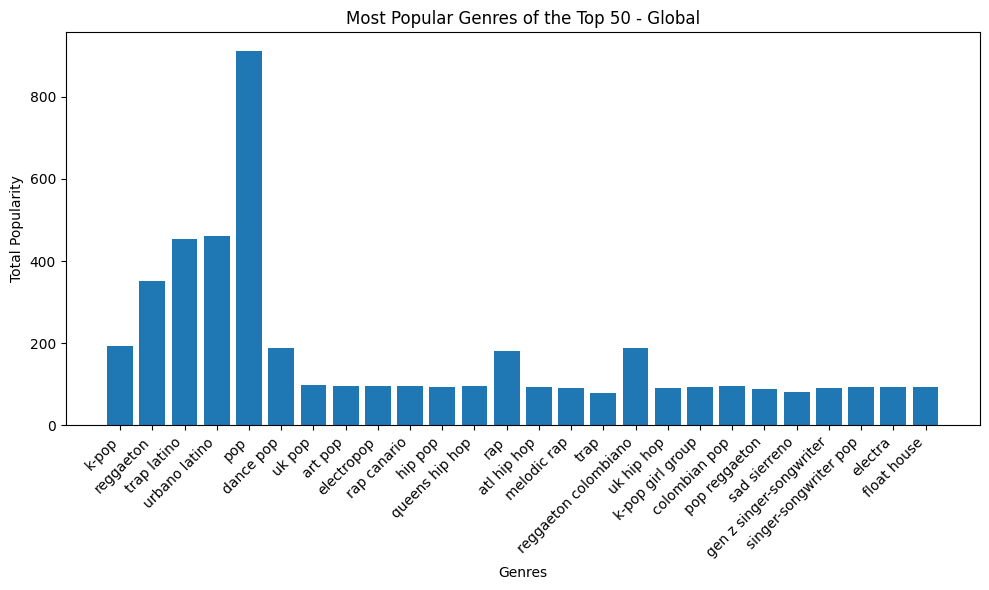

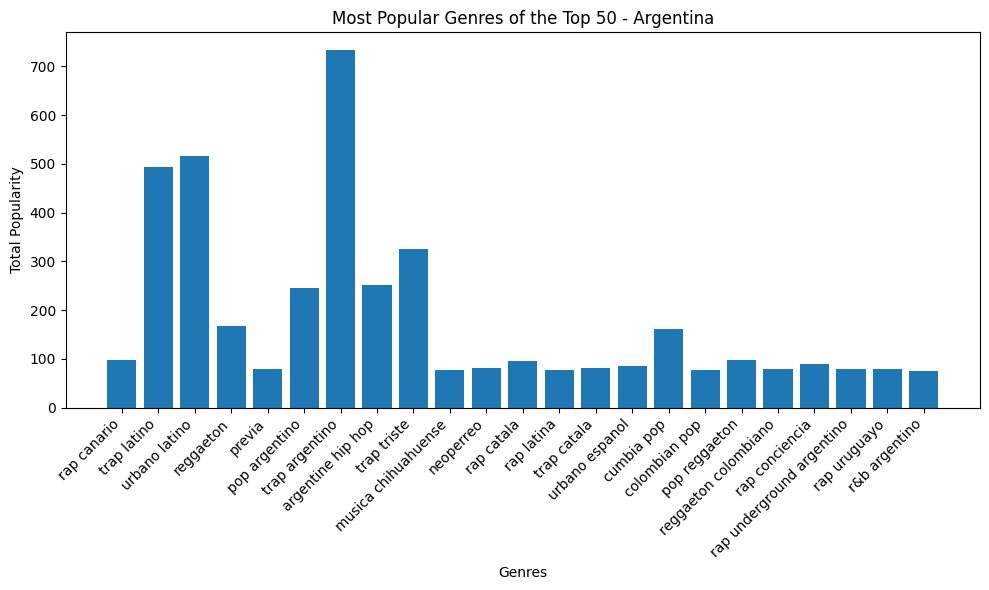

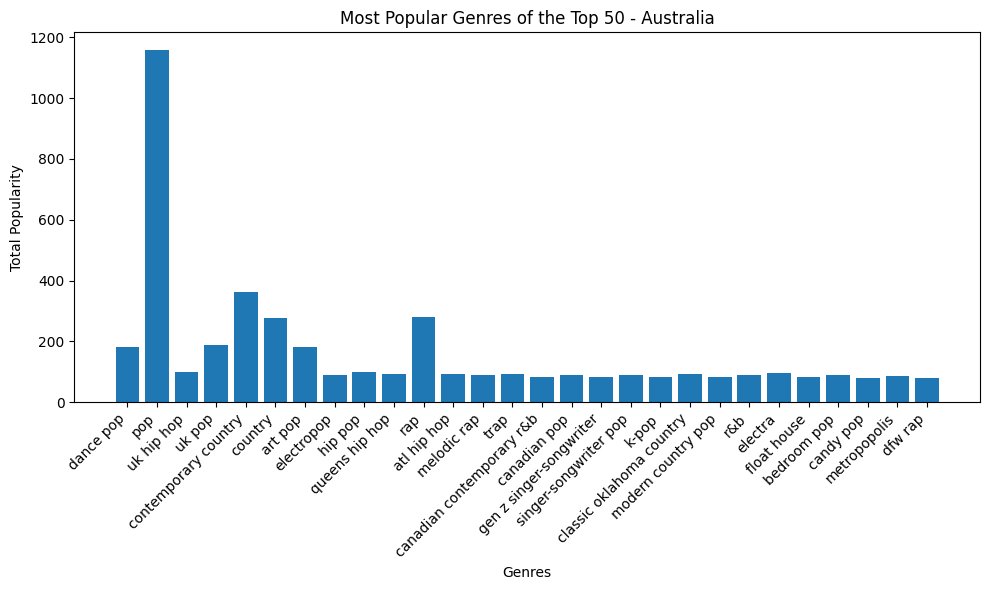

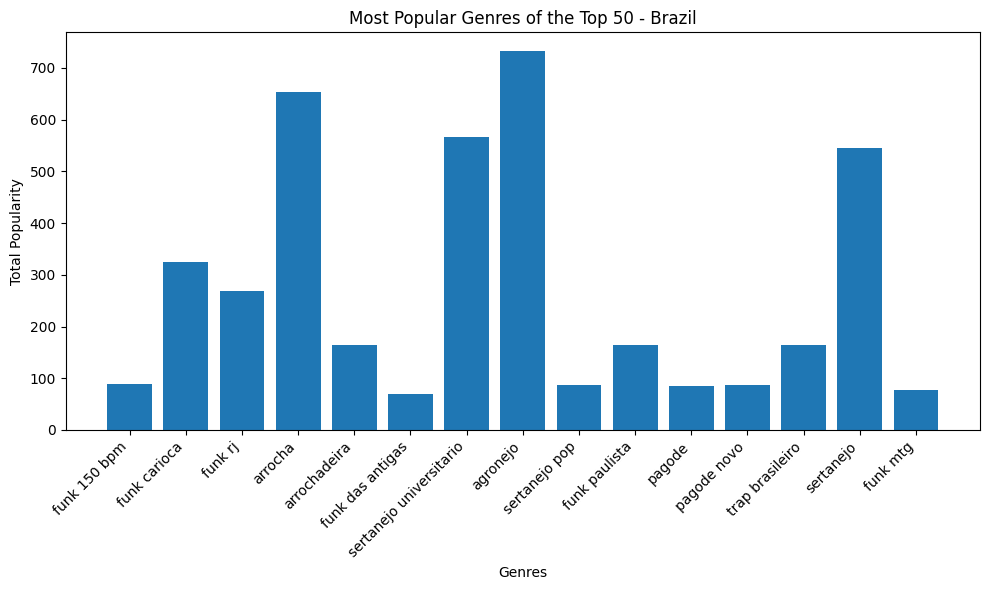

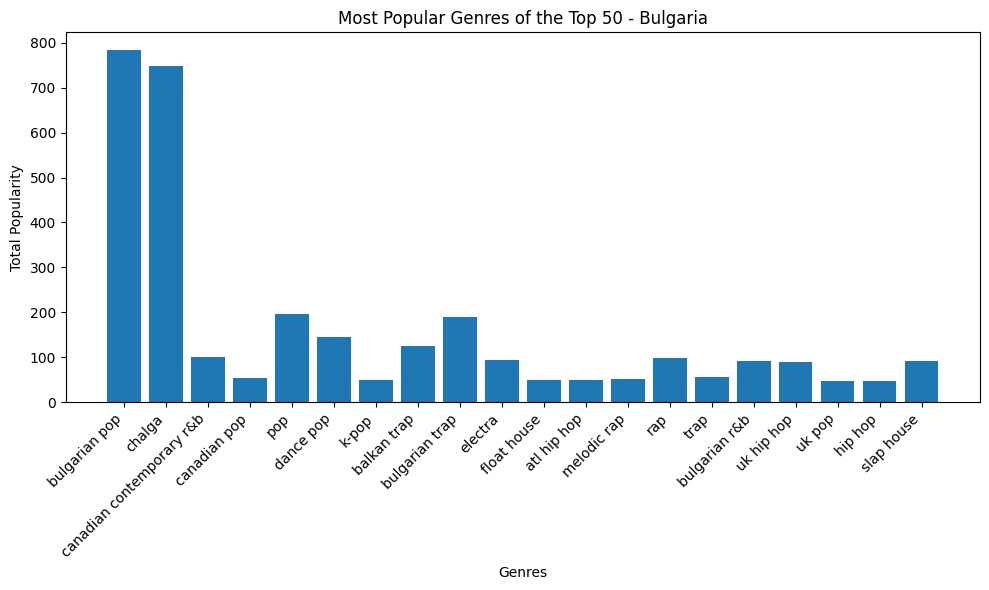

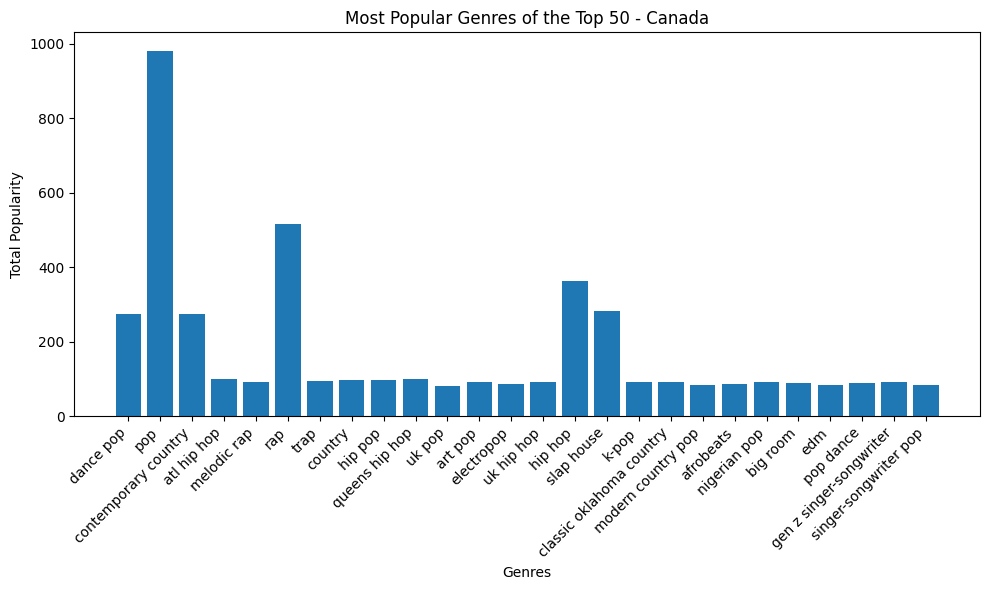

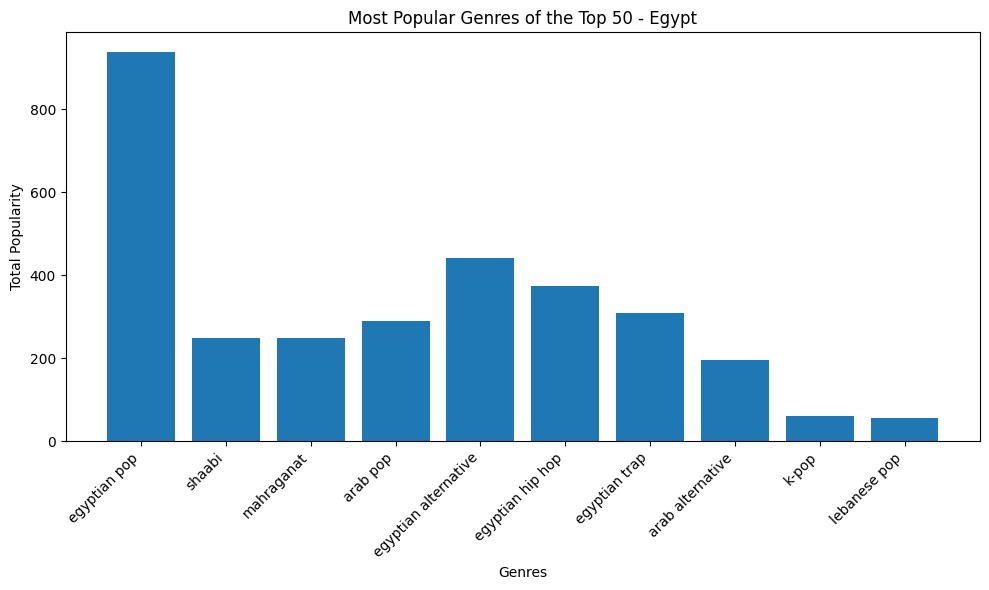

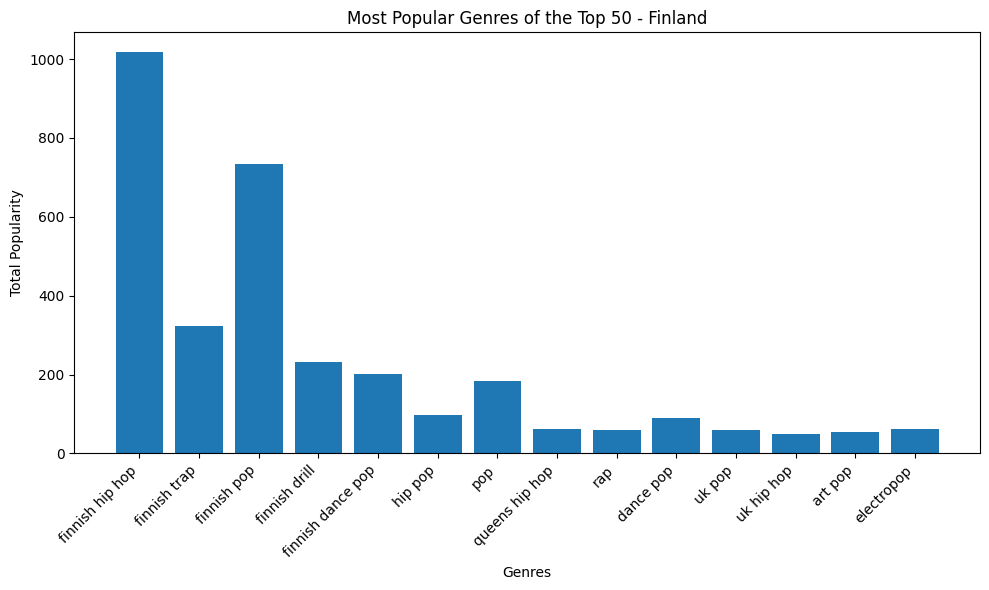

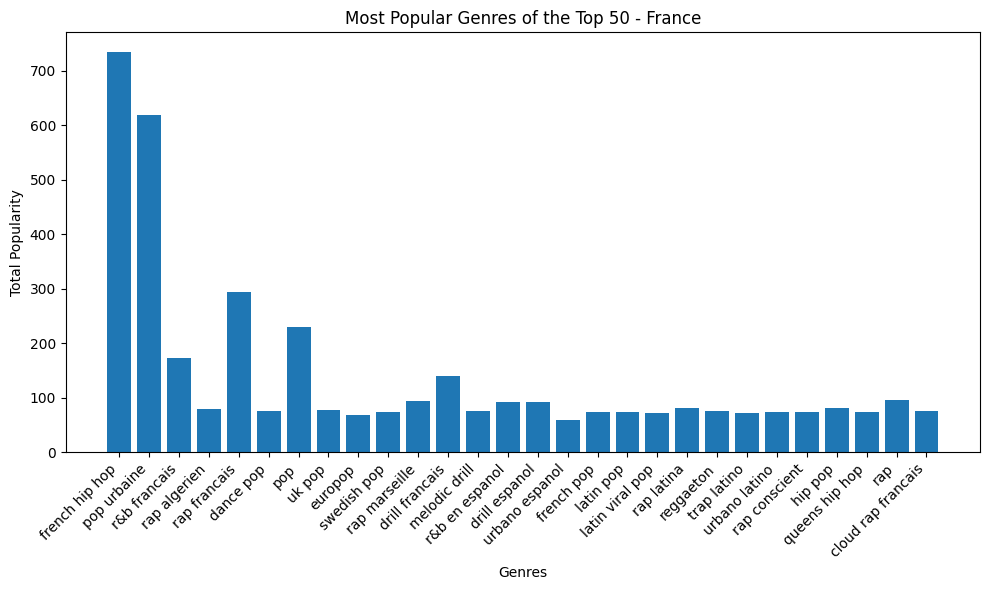

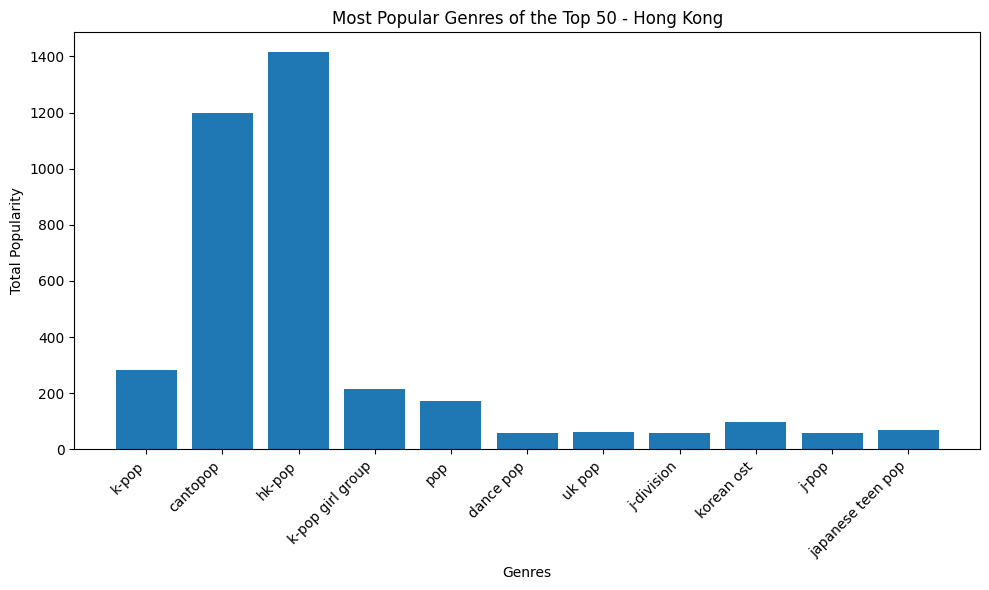

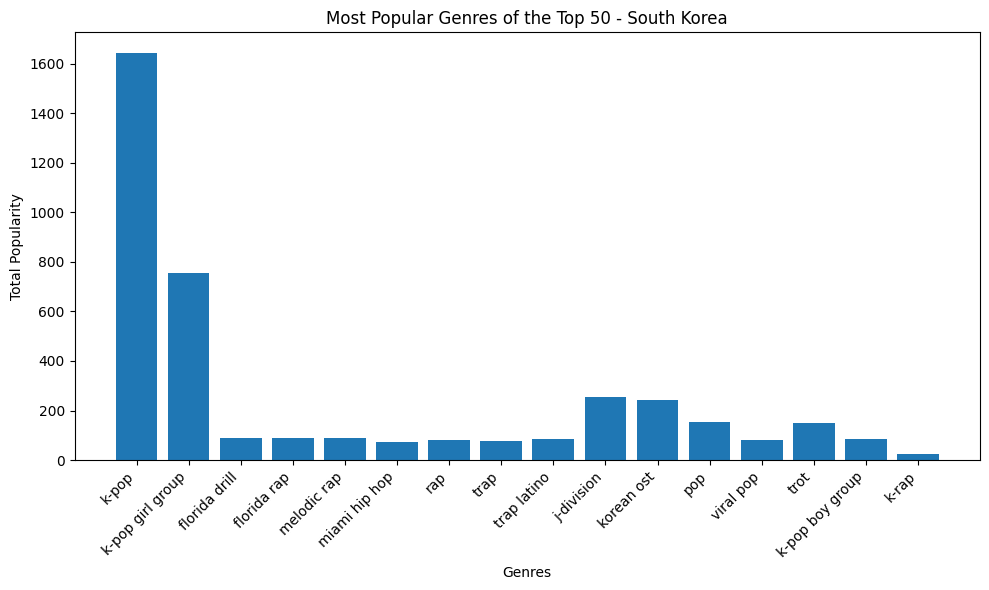

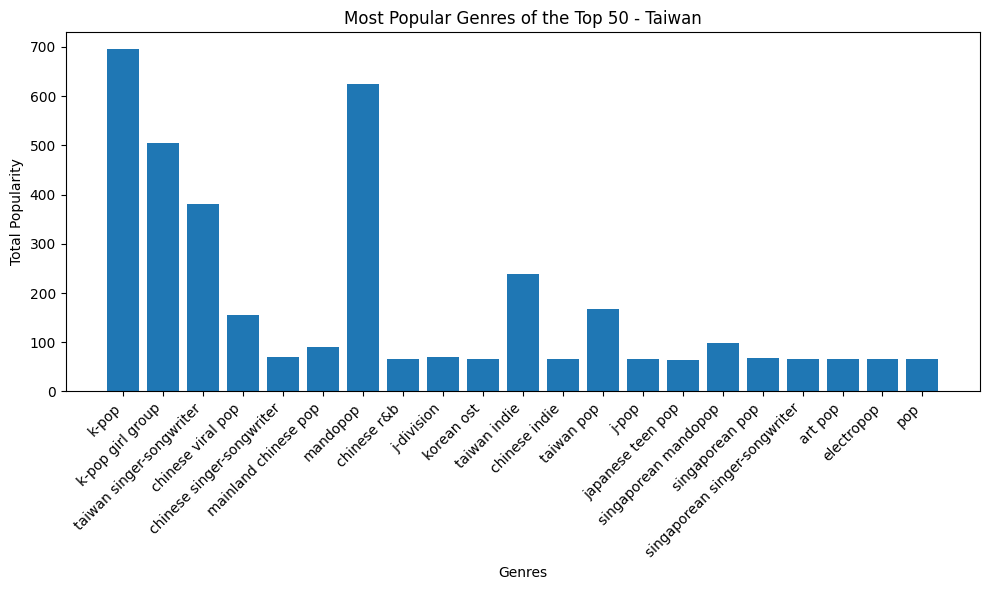

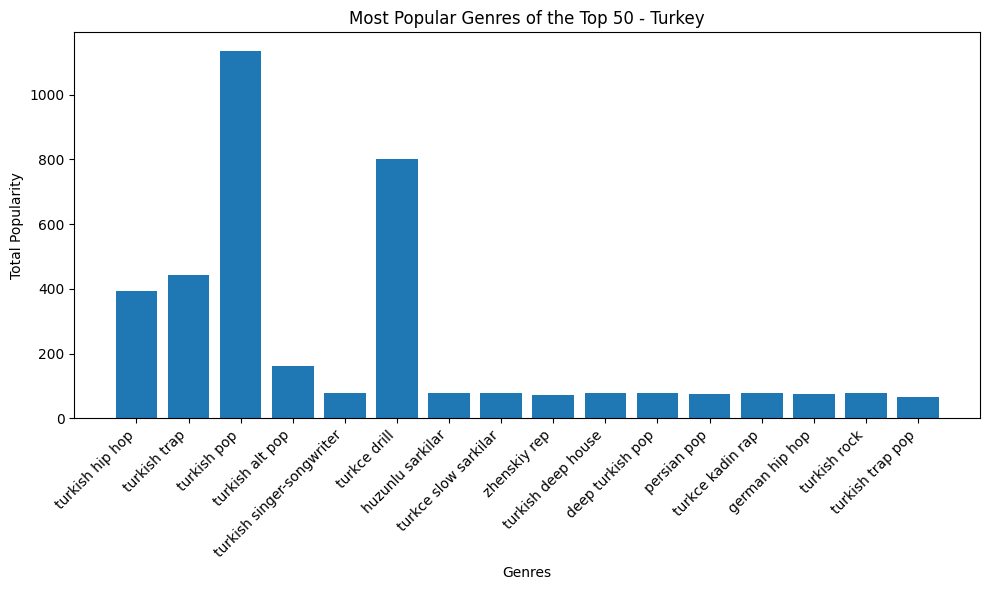

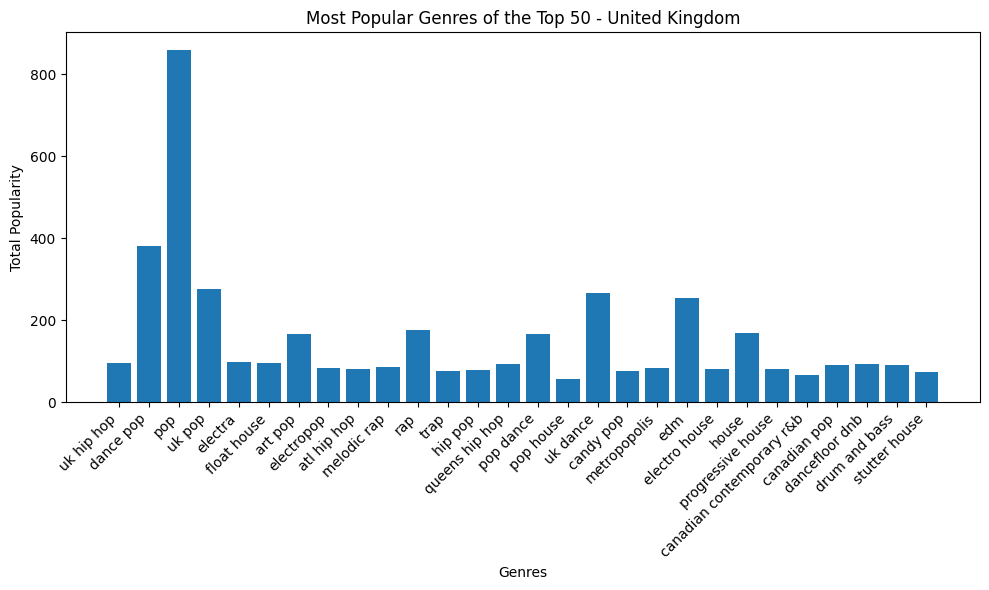

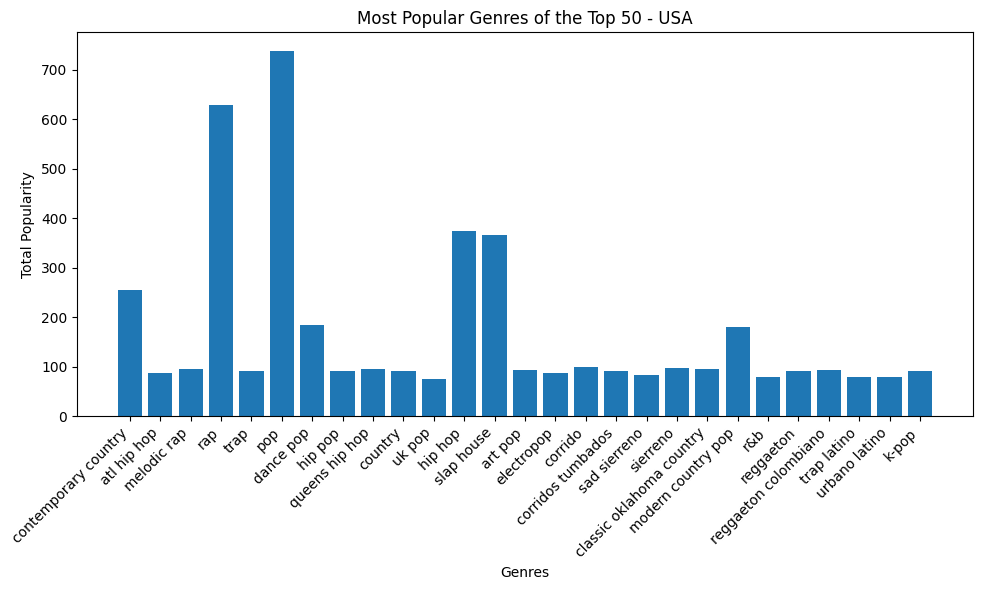

In [6]:
# Create bar plots for each playlist
for playlist_url in playlist_urls:
    genre_popularity = retrieve_genres_popularity(playlist_url)
    playlist_info = sp.playlist(playlist_url)
    playlist_name = playlist_info["name"]

    plt.figure(figsize=(10, 6))
    plt.bar(genre_popularity.keys(), genre_popularity.values())
    plt.xlabel('Genres')
    plt.ylabel('Total Popularity')
    plt.title(f'Most Popular Genres of the {playlist_name}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

As we can see from the bar graphs, genre is one of the most important factors that plays into the success of a song. The majority of the most popular genres across all the countries were “versions” of pop music sung in the native language i.e. “K-pop” being popular in South Korea, “Egyptian Pop” being the most popular in Egypt, and “Bulgarian Pop” being the most popular in Bulgaria. However there are some outliers that can be explained by other factors. For example, K-pop is the most popular in South Korea which, following our trend, makes sense as it is a genre sung in Korean. However, it is also most popular in Taiwan, which is a Mandarin Chinese speaking country (another example of this is the popularity of UK pop and hip hop in Finland). This can be chalked down to factors such as geographical location, as Taiwan and South Korea are relatively close to each other, and the fact that K-pop is popular internationally. The latter can be seen in the fact that K-pop is a genre included in the Top 50 playlists of not only South Korea and Taiwan, but also Australia, Bulgaria, Canada, Egypt, Hong Kong, and the USA.

Part 3 Exploratory analysis & Data viz


observing a few the top 50 song across each country we can see that it looks like the sweet spot for song length using the spotify popularity metric is about 200k ms.There are not many examples of song that reach the top 50 around 300k ms but when they do they are not high in the top 50.However while songs around 100k are similarly far and few between they seem to perform a bit better when they do.


In [7]:
#South Korea
px.scatter(dataframes[10],x='duration_ms',y='pop',color='tracks')

In [8]:
#Egypt
px.scatter(dataframes[6],x='duration_ms',y='pop',color='tracks')

In [9]:
# Brazil
px.scatter(dataframes[3],x='duration_ms',y='pop',color='tracks')

In [10]:
#USA
px.scatter(dataframes[14],x='duration_ms',y='pop',color='tracks')

In [11]:
# looking at every countries top 50 expect globle
countrysdataframes=dataframes[1:]
countrysdataframes
countrysplaylistdf=pd.concat(countrysdataframes).drop_duplicates(subset='tracks', keep="first")
px.scatter(countrysplaylistdf,x='duration_ms',y='pop',color='tracks')

In [12]:
# Global
px.scatter(dataframes[0],x='duration_ms',y='pop',color='tracks')

As one might expect looking at Average popularity score and amount of songs that match global top 50 songs we can see the The barrier to entry for each country top 50 songs rasies if the amount of cross over has with the global top 50 increases. Allowing us to see the markets that have the most influence over the global top 50 songs.

In [13]:
similarly_counter_list=[]
for (index,x) in enumerate(dataframes):
  similarly_counter_list.append( len(pd.merge(dataframes[0], x, how ='inner', on='tracks')))

px.bar(x=playlist_names,y=similarly_counter_list,color=playlist_names)


In [14]:
mean_counter_list=[]
for (index,x) in enumerate(dataframes):
  mean_counter_list.append( x['pop'].mean())

px.bar(x=playlist_names,y=mean_counter_list,color=playlist_names)

Analysis hypothesis testing & ML
In this section, we will start to observe the relationship between things such as the population metrics created by Spotify and the length of the song so that we can start to understand what does Spotify when it wants to put a song in front of a user. Besides just raw downloads. By looking at the linear relationship and creating a linear model between the duration of the song and genre for popularity.


Looking at the linear regression model results, we can see that the R-squared for 'pop ~ duration_ms' is low. Indicating that at least alone it is not a good predictor of popularity. Meaning that in conjunction with a higher p value we would accept the null hypothesis of no relationship between popularity and duration of time. This was pretty surprising considering that looking at charts this did seem to be the case. ultimately what this suggests is that their is so much more that goes into determining what is popular in the eyes of Spotify

In [15]:
pop_regress_model = smf.ols(formula="pop ~ duration_ms ", data=countrysplaylistdf).fit()
print(pop_regress_model.summary())
pop_regress_model.params

                            OLS Regression Results                            
Dep. Variable:                    pop   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     8.148
Date:                Sun, 20 Aug 2023   Prob (F-statistic):            0.00448
Time:                        22:16:47   Log-Likelihood:                -2102.1
No. Observations:                 526   AIC:                             4208.
Df Residuals:                     524   BIC:                             4217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      81.1202      2.627     30.876      

Intercept      81.120170
duration_ms    -0.000038
dtype: float64

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

feature_columns = ['pop']
target_column = 'duration_ms'

combined_df = pd.concat(countrysdataframes, ignore_index=True)

X = combined_df[feature_columns]
y = combined_df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()

model.fit(X_train, y_train)


predictions = model.predict(X_test)


mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 1910469534.3598092
Root Mean Squared Error: 43708.918247421876
Mean Absolute Error: 33638.68894674409


Mean Squared Error (MSE): 1910469534.359809
The Mean Squared Error measures the average squared difference between the predicted song durations and the actual song durations. A lower MSE indicates a better fit of the model to the data. In this case, the relatively high MSE suggests that the model's predictions are not perfectly aligned with the actual song durations, which is expected given the complexity of predicting song success based on just the 'popularity' feature.

Root Mean Squared Error (RMSE): 43708.918247421876
The Root Mean Squared Error is the square root of the MSE and represents the average difference between the predicted and actual song durations in the same units as the target variable. The RMSE value of 63717.11 indicates that, on average, the model's predictions are off by approximately 43708 milliseconds (around 1 minute) from the actual song durations.

Mean Absolute Error (MAE): 33638.688946744085
The Mean Absolute Error measures the average absolute difference between the predicted and actual song durations. The MAE value of 33638.688946744085 signifies that, on average, the model's predictions deviate from the actual durations by around 33638 milliseconds (a little less than 1 minute).

Interpretation and Insights:
Given the evaluation metrics, it's clear that the current model has limitations in accurately predicting song durations based solely on the 'popularity' feature. These metrics suggest that the model tends to make predictions that are somewhat off from the actual durations.

To maximize the success of a song in terms of duration, you might need to consider more features beyond just 'popularity'. Factors like artist reputation, genre, release date, and even more complex audio features such as tempo, energy, and danceability could play a significant role in determining a song's success duration.

Additionally, it's important to remember that predicting song success is a multifaceted task influenced by various factors, some of which may not be captured in the dataset you're currently using. Exploring and incorporating a broader range of features, as well as experimenting with more advanced machine learning techniques, could potentially lead to improved predictive performance.

In conclusion, while the current model's predictions might not be highly accurate, this initial attempt provides a foundation for further exploration and refinement in predicting song success durations. It's crucial to keep iterating on the model by incorporating more relevant features and refining the model architecture to achieve more accurate predictions.

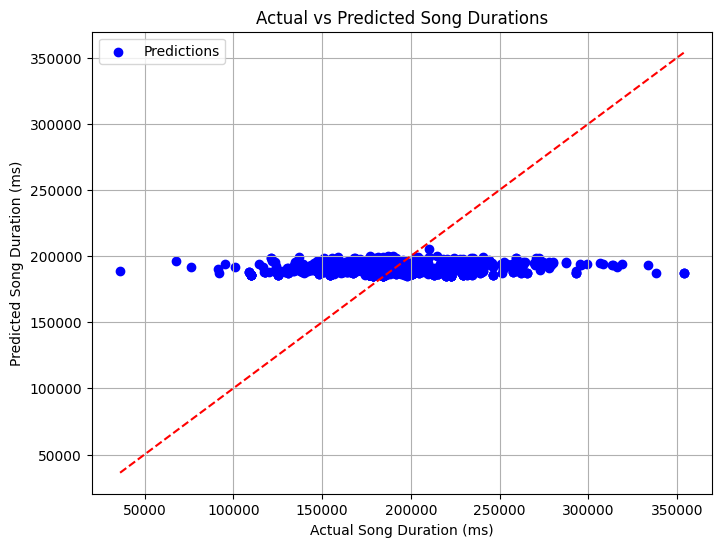

In [17]:
actual_durations = combined_df['duration_ms']  
predicted_durations = model.predict(X)  
plt.figure(figsize=(8, 6))
plt.scatter(actual_durations, predicted_durations, color='blue', label='Predictions')

plt.plot([min(actual_durations), max(actual_durations)],
         [min(actual_durations), max(actual_durations)], color='red', linestyle='--')

plt.xlabel('Actual Song Duration (ms)')
plt.ylabel('Predicted Song Duration (ms)')
plt.title('Actual vs Predicted Song Durations')
plt.legend()
plt.grid()
plt.show()

From the data we can see that there are a lot of factors that influence the success of a song, but based on historical trends and industry norms, a song duration of around 3 to 4 minutes is often considered a good starting point for maximizing accessibility and engagement. This range aligns with listeners' attention spans, fits well with radio programming, and is generally well-suited for streaming platforms.

Please remember that this is a very rough guideline and can vary widely depending on factors such as genre, artistic intent, and audience preferences. It's important to use your best judgment and consider the unique characteristics of each song you create.

In [18]:
pop_regress_model = smf.ols(formula="pop ~ duration_ms + date", data=countrysplaylistdf).fit()
print(pop_regress_model.summary())
pop_regress_model.params

                            OLS Regression Results                            
Dep. Variable:                    pop   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     1.717
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           6.27e-06
Time:                        22:16:47   Log-Likelihood:                -1872.1
No. Observations:                 526   AIC:                             4224.
Df Residuals:                     286   BIC:                             5248.
Df Model:                         239                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             90.4359     12

Intercept             90.435948
date[T.1985-02-25]     2.915874
date[T.1996-07-14]   -10.729003
date[T.1997-04-22]   -16.981298
date[T.2003-07-31]   -19.840784
                        ...    
date[T.2023-08-16]   -40.423240
date[T.2023-08-17]   -38.198224
date[T.2023-08-18]   -32.916000
date[T.2023-08-19]   -62.635997
duration_ms           -0.000013
Length: 240, dtype: float64

Looking at this final linear model we can see that the we can see that the R-squared is staring to improve. Creating a model we actually start to use to predict popularity index with some confidence.

In [19]:
pop_regress_model = smf.ols(formula="pop ~ duration_ms + date + artists", data=countrysplaylistdf).fit()
print(pop_regress_model.summary())
pop_regress_model.params

                            OLS Regression Results                            
Dep. Variable:                    pop   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     17.59
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           3.21e-22
Time:                        22:16:48   Log-Likelihood:                -758.45
No. Observations:                 526   AIC:                             2469.
Df Residuals:                      50   BIC:                             4499.
Df Model:                         475                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

Intercept             71.117943
date[T.1985-02-25]     8.701351
date[T.1996-07-14]     1.622983
date[T.1997-04-22]    -0.600662
date[T.2003-07-31]    -2.852349
                        ...    
artists[T.陈壹千]        -9.795014
artists[T.陳卓賢 Ian]    -5.332156
artists[T.陳華]         -1.245466
artists[T.高爾宣 OSN]    -8.312320
duration_ms            0.000006
Length: 593, dtype: float64

After conducting a thorough analysis through the models and charts we have constructed, That showed things such as the barriers to entry for a song to be popular enough to crack the top 50 in a specific market which can differ a decent amount depending on the country, what Market is most influential creating popular music, or What exactly is the best genre of music is to land you in the top 50 songs globally. We have gained a profound understanding of what truly makes a song Popular by reverse-engineering Spotify's popularity metric. Through the utilization of the models, we created that factor in variables such as duration_ms, release_date, artist, and tracks. Doing a bit more research you can find out about what goes into this popularity index via these resources "Spotify Popularity — A unique insight into the Spotify algorithm and how to influence it"  and "WHAT IS THE SPOTIFY POPULARITY INDEX?" which discuss this metric. Saying thing like "The first week of a release is critical for its success" which kind of confirmed what we had seen. Additionally, the sources also talked about “ Total streams of a song,How recently a song has been played, and The frequency that a track has been played”.which we did not factor into our models. It's a bit unfortunate that this data is also not given with the spotify api  but we think overall there is still a lot to take away with the information given.

https://twostorymelody.com/spotify-popularity-index/#:~:text=In%20short%2C%20the%20Spotify%20popularity,a%20track%20has%20been%20played.


https://www.loudlab.org/blog/spotify-popularity-leverage-algorithm/#:~:text=The%20Spotify%20Popularity%20Index%20is,on%20algorithmic%20playlists%20and%20recommendations.